<center>
<table style="border:none">
    <tr style="border:none">
    <th style="border:none">
        <a  href='https://colab.research.google.com/github/AmirMardan/ml_course/blob/main/5_data_analysis_processing/0_introduction_to_EDA.ipynb'><img src='https://colab.research.google.com/assets/colab-badge.svg'></a>
    </th>
    <th style="border:none">
        <a  href='https://github1s.com/AmirMardan/ml_course/blob/main/5_data_analysis_processing/0_introduction_to_EDA.ipynb'><img src='../imgs/open_vscode.svg' height=20px width=115px></a>
    </th>
    </tr>
</table>
</center>


This notebook is created by <a href='https://amirmardan.github.io'> Amir Mardan</a>. For any feedback or suggestion, please contact me via <a href="mailto:mardan.amir.h@gmail.com">email</a>, (mardan.amir.h@gmail.com).



<a name='top'></a>
# Exploratory data analysis

**Exploratory data analysis** or **EDA** is a crucial step in every machine-learning project that leads to understanding data. 
The application of EDA is to
- Understand the statistics about data
- Find the missing values and redundancies and face them
- Find the correlation between features
- Understand the importance of features
- Visualization and summarization


This notebook will cover the following topics:

- [1. Import packages and dataset](#import)
- [2. Initial general assessment](#general)
- [3. Basic analysis](#basic)
- [4. Missing data](#missing)
- [5. Outliers](#outliers)
- [6. Correlation](#Correlation)


<a id='import'></a>
## 1. Import packages and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()

In [2]:
!curl -O https://raw.githubusercontent.com/AmirMardan/ml_course/main/data/titanic_train.csv
!curl -O https://raw.githubusercontent.com/AmirMardan/ml_course/main/data/titanic_test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 61194  100 61194    0     0   165k      0 --:--:-- --:--:-- --:--:--  170k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28629  100 28629    0     0  97674      0 --:--:-- --:--:-- --:--:--   98k


In [3]:
df = pd.read_csv('./titanic_train.csv')
df_test = pd.read_csv('./titanic_test.csv')


<a id='general'></a>
## 2. Initial assessment

- `PassengerId` is the unique id of the row and it doesn't have any effect on the target
- `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1** = Survived
    - **0** = Not Survived
- `Pclass` (Passenger Class) is the status of the passenger and it is a categorical ordinal feature which has 3 unique values (**1**, **2**, or **3**):
    - **1** = Upper Class
    - **2** = Middle Class
    - **3** = Lower Class
- `Name`, `Sex`, and `Age` are self-explanatory
- `SibSp` is the total number of the passengers' siblings and spouse
- `Parch` is the total number of the passengers' parents and children
- `Ticket` is the ticket number of the passenger
- `Fare` is the passenger fare
- `Cabin` is the cabin number of the passenger
- `Embarked` is port of embarkation and it is a categorical feature which has 3 unique values (**C**, **Q**, or **S**):
    - **C** = Cherbourg
    - **Q** = Queenstown
    - **S** = Southampton

We can see the first `n` samples of a DataFrame using `DataFrame.head(n)` where the default value for `n` is 5.

In [4]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


We can see the last `n` samples of a DataFrame using `DataFrame.tail(n)` where the default value for `n` is 5.

In [5]:
df.tail(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


We can see `n` random samples of a DataFrame using `DataFrame.sample(n)` where the default value for `n` is 1.

In [6]:
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S


In [7]:
df.shape

(891, 12)

There are 891 people with 12 columns.
We can get basic information about the DataFrame using `DataFrame.info()`. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As is shown, there are 12 columns. `Survived` is the target and the other 11 features are *predictors*.
The data frame is a mix of categorical and numerical data.
We also have missing values, especially in `Cabin`.

We can get some statistical insight about data using `DataFrame.describe()`.

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id='basic'></a>
## 3. Basic analysis

We can now dig the data more and get more information.
The first thing I would like to know is about the number of people who survived and who couldn't make it. 

In [10]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

So, 342 people out of 891 survived this disaster. Although there were approximately 2224 passengers and crew aboard, we talk about the numbers in our dataset.

<AxesSubplot:xlabel='Survived', ylabel='count'>

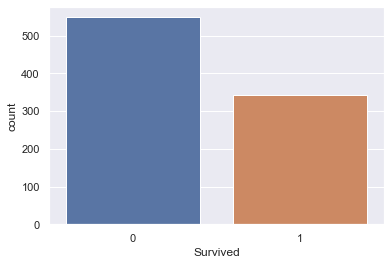

In [11]:
sns.countplot(data=df, x='Survived')

Show the passengers based on their gender

<AxesSubplot:xlabel='Sex', ylabel='count'>

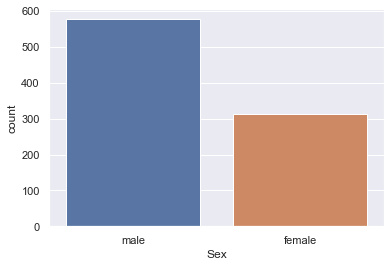

In [12]:
sns.countplot(data=df, x='Sex')

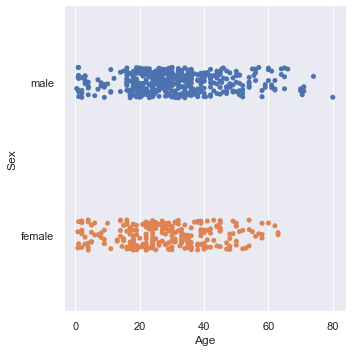

In [13]:
g = sns.catplot(data=df, x='Age', y='Sex', kind='strip')

As the target is categorical, I create a categorical version of `Survived` for further studies.

In [14]:
# To make it easier for our studies, I make a catergorical version of the targert
df['Survived_cat'] = df['Survived'].astype('category')


df['Pclass'] = df['Pclass'].astype('category')

Let's plot the target based on the age of people.

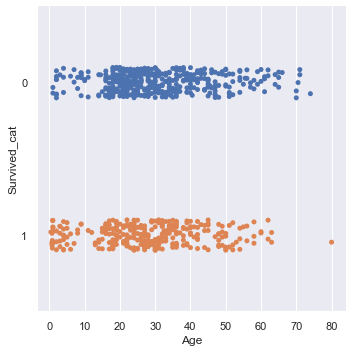

In [15]:
ax = sns.catplot(data=df, x='Age', y='Survived_cat',kind='strip')

Has the place of embarkation

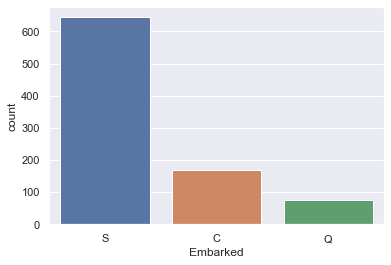

In [16]:
ax = sns.countplot(data=df, x='Embarked')

So, most of people embarked in Southampton.

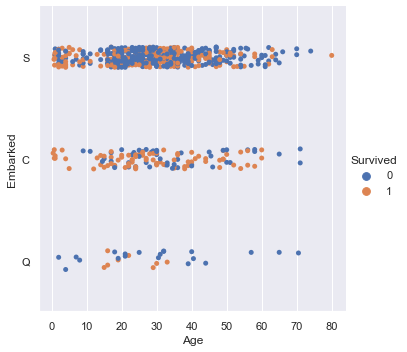

In [17]:
g = sns.catplot(data=df, x='Age', y='Embarked', hue='Survived')

It seems that people who embarked in Cherbourg had more possibility to survive. This is clear if we group the data based on the place of embarkation. 
To do so, I create a copy of dataframe with `Survived` as a numerical feature.

In [18]:
df_numerical= df.copy()
df_numerical['Survived'] = df_numerical['Survived'].astype(np.int32)
df_numerical.groupby(['Embarked']).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,445.357143,0.553571,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,29.445397,0.571429,0.413043,27.079812


It also seems that passengers from Cherbourg were older with fewer siblings and used more expensive parts of the ship.

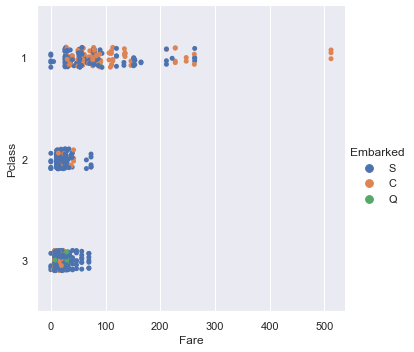

In [19]:
g =sns.catplot(data=df, y='Pclass', x='Fare', kind='strip', hue='Embarked')

This type of analysis can continue and there is no limit to it.

<a id='missing'></a>
## 4. Missing data

It's important to decrease the number of missing values in the data. So, first, we need to know about the situation of missing values in the dataframe. We can get the number of missing values for each feature by using

```Python
df.isna().sum().sort_values(ascending=False)
```

In [20]:
df.isna().sum().sort_values(ascending=False)

Cabin           687
Age             177
Embarked          2
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Survived_cat      0
dtype: int64

One can present the missing values in percentage

```Python
df.isna().sum().sort_values(ascending=False)/df.shape[0] * 100
```

In [21]:
df.isna().sum().sort_values(ascending=False)/df.shape[0] * 100

Cabin           77.104377
Age             19.865320
Embarked         0.224467
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Survived_cat     0.000000
dtype: float64

As is shown, the most missing values belong to `Cabin`. 
We'll discuss how to deal with missing values in the next notebooks but for now and as an example, let's start with the easiest one which is `Embarked`.


In [22]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_cat
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


There are two missing values for `Embarked`. We can find easily on the internet that these people's embarkation should be `S`.

In [23]:
df.loc[df['Embarked'].isna(), 'Embarked'] = 'S'

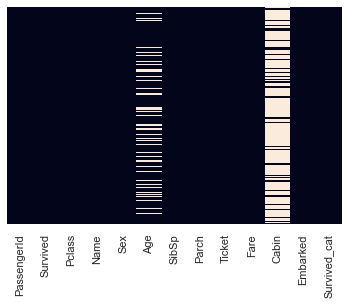

In [24]:
ax = sns.heatmap(df.isna(), yticklabels=False, cbar=False)

<a id='outliers'></a>
## 5. Outliers

Many machine learning algorithms are sensitive to the range and distribution of the variables.
Outliers can skew and mislead the training process which can cause
- longer learning time,
- less accuracy


<center>
<img src='./img/outlier.png' width='300px'>
</center>

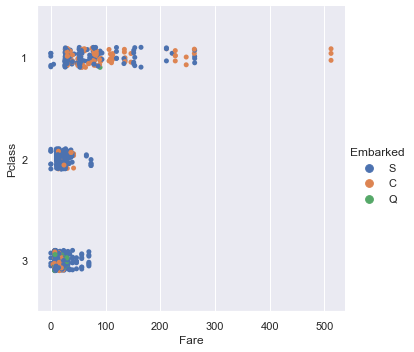

In [25]:
g = sns.catplot(data=df, y='Pclass', x='Fare', kind='strip', hue='Embarked')

It seems there are some outliers in `Pclass = 1`. We can find these samples as follows.

In [26]:
df[(df['Pclass']==1) & (df['Embarked']=='C')].sort_values('Fare', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_cat
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1


By a little search on the internet, I found that these samples are correct and belong to Mr. Thomas Drake Martinez Cardeza and his manservant and his mother's maid. However, his mother's sample is in the test set.

In [27]:
df_test[df_test['Ticket']=='PC 17755']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


Mr. Thomas Drake Martinez Cardeza and his mother, Mrs. James Warburton Martinez, were living in one of the two most luxurious rooms.

<center>
<img src='./img/cab51.png', width='500px'>
</center>

If I plot boxplot of `Fare` for different cities, I can get

In [28]:
def boxplot_embarked(df1):
    fig = plt.figure(figsize=(12, 4))
    i = 1
    for city in df['Embarked'].unique():
        if city is not np.nan:
            ax = fig.add_subplot(1, 3, i)
            ax = sns.boxplot(data=df1[df1['Embarked']==city], y='Fare')
            ax.set_title(city)
            i += 1

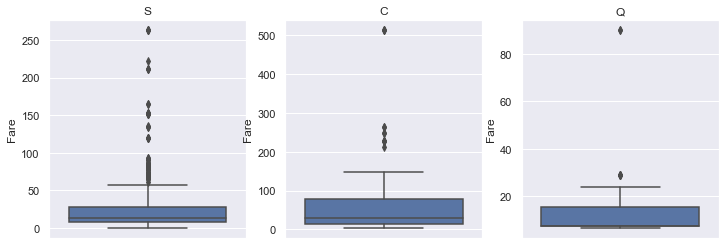

In [29]:
boxplot_embarked(df)

For higher values in `Q`, I checked again by searching on the internet and these samples are confirmed here
https://www.encyclopedia-titanica.org/titanic-victim/william-edward-minahan.html



In [30]:
df[(df['Embarked']=='Q') & (df['Pclass']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_cat
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0,C78,Q,0
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0,C78,Q,1


These samples belong to Dr. William Edward Minahan and his sister. The sample of his wife belongs to the test set. Although I know she was rescued, I leave this sample in the test set for the sake of the competition. They were the 3 first-class passengers embarked in Queenstown with fare of 90 ￡.

<center>
<table>
<tr>
    <tc>
        <img src='./img/William.png' width='200px' height='250px'>
    </tc>
    <tc>
        <img src='./img/Daisy.png' width='200px' height='250px'>
    </tc>
</tr>
</table>
</center>

In [31]:
df_test[df_test['Ticket']=='19928']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0,C78,Q


So, it seems although we see some high values for `Fare`, these values are actually correct.


<a id='Correlation'></a>
## 6. Correlation

Correlation is really important for learning more about data. 
This is a tool for feature selection which will be discussed in the next notebooks.

Correlation between two variables show how much those two variables contain the same information.

In [32]:
corr = df.corr()
corr

,PassengerId,Survived,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.077221,-0.035322,0.081629,0.257307
Age,0.036847,-0.077221,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,0.096067,0.159651,0.216225,1.000000


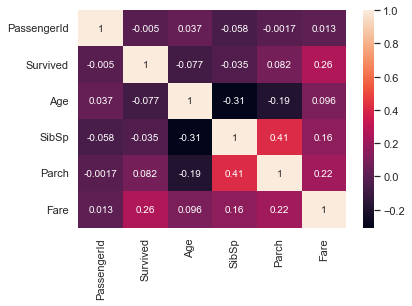

In [33]:
ax = sns.heatmap(corr, annot=True)

We can also have the correlation of all variables with respect to one variable.

In [34]:
corr_survived = df.corr()['Survived']
corr_survived

PassengerId   -0.005007
Survived       1.000000
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [35]:
x = corr_survived.abs().sort_values(ascending=False) 
x.drop(index=['Survived'], inplace=True)

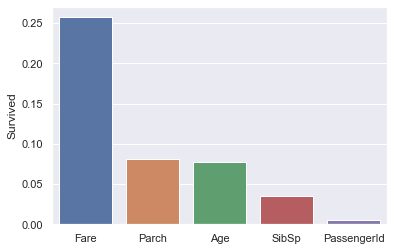

In [36]:
ax = sns.barplot(x=x.index, y=x)

### [TOP ☝️](#top)